<a href="https://colab.research.google.com/github/Meiyi-Wu/blooket-hack/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import required libraries
import numpy as np # a number of mathematical operations on arrays(multi-dementional,matrix,random number generator)
import pandas as pd #Pandas for data analysis, Pandas objects rely on Numpy objects

In [ ]:
#import the boston dataset
from sklearn.datasets import load_boston
boston_dataset = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
df_boston = pd.DataFrame(boston_dataset.data)
df_boston

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
#convers columns' name
df_boston = pd.DataFrame(boston_dataset.data)
df_boston.columns = boston_dataset.feature_names
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
df_boston['Price'] = boston_dataset.target
df_boston['Price']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [ ]:
# A dataframe 
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
#find null values
df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

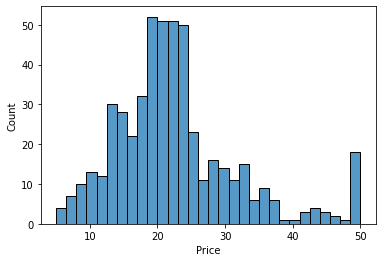

In [ ]:
#Data Wrangling and Exploratory Data Analysis
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df_boston['Price'],bins=30)
plt.show()

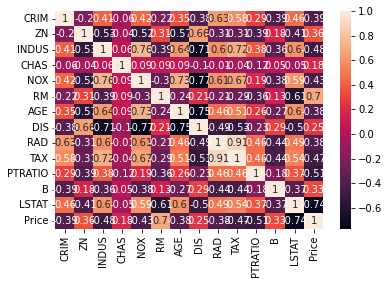

In [ ]:
#create a correlation matrix that measures the linear relationships between the variables
correlation_matrix = df_boston.corr().round(2)
sns.heatmap(data = correlation_matrix, annot=True)


In [ ]:
# assign features on X axis 
X_features = boston_dataset.data
Y_target = boston_dataset.target

In [ ]:
#print the intercept
print('the estimated intercept %.2f'%lineReg.intercept_)

the estimated intercept 36.46


In [ ]:
#print the coefficient
print('the coefficient is %d' %len(lineReg.coef_))

the coefficient is 13


In [ ]:
# train model split the whole dataset into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_features,Y_target)
print(X_train,X_test,Y_train,Y_test)

[[1.33598e+01 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.96900e+02
  1.63500e+01]
 [3.61500e-02 8.00000e+01 4.95000e+00 ... 1.92000e+01 3.96900e+02
  4.70000e+00]
 [5.42500e-02 0.00000e+00 4.05000e+00 ... 1.66000e+01 3.95600e+02
  6.29000e+00]
 ...
 [2.21880e-01 2.00000e+01 6.96000e+00 ... 1.86000e+01 3.90770e+02
  6.58000e+00]
 [1.44208e+01 0.00000e+00 1.81000e+01 ... 2.02000e+01 2.74900e+01
  1.80500e+01]
 [3.04100e-02 0.00000e+00 5.19000e+00 ... 2.02000e+01 3.94810e+02
  1.05600e+01]] [[6.29760e-01 0.00000e+00 8.14000e+00 ... 2.10000e+01 3.96900e+02
  8.26000e+00]
 [9.10300e-02 0.00000e+00 2.46000e+00 ... 1.78000e+01 3.94120e+02
  4.82000e+00]
 [6.12700e-02 4.00000e+01 6.41000e+00 ... 1.76000e+01 3.93450e+02
  4.16000e+00]
 ...
 [5.30200e-02 0.00000e+00 3.41000e+00 ... 1.78000e+01 3.96060e+02
  5.70000e+00]
 [5.78000e-02 0.00000e+00 2.46000e+00 ... 1.78000e+01 3.96900e+02
  5.04000e+00]
 [3.67367e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.88620e+02
  1.05800e+01]] [12.7 27.9 24.6 

In [ ]:
# Print shapes of the training and testing data sets
print( X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 13) (127, 13) (379,) (127,)


In [ ]:
lineReg.fit(X_train,Y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
y_train_predict = lineReg.predict(X_train)


In [ ]:
rmse=np.sqrt(mean_squared_error(Y_train,y_train_predict))

In [ ]:
r2=r2_score(Y_train,y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format (r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 4.752734730390124
R2 score is 0.7398861870731885




In [ ]:
# model evaluation for testing set
y_test_predict = lineReg.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 4.608637366569337
R2 score is 0.7247966802681785


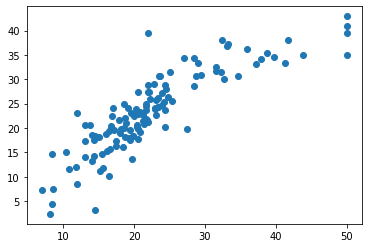

In [ ]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict)
plt.show()